# Introduction

For this coursework, I have decided to develop a text classifier and used it for sentiment analysis. This project will revolve around the tweets posted relating to covid-19 vaccines.

### 1. Domain-specific area 
The presence of negative comments about the covid-19 vaccine on twitter might influence people to have bad impressions on the vaccines. Some might even provide "alternative remedies" which might be harmful to people who try to follow it instead of getting a vaccine. By applying sentiment analysis on the tweets related to covid-19 vaccines, the tweets can be categorized into postive, neutral and negative. 
Sentiment Analysis is used for this text classification as in this project we will be reviewing the tweets about covid-19 vaccine that is being posted by people. Sentiment analysis will help as it estimates the sentiments of the tweets whether they are positive or negative.
 

### 2. Objectives 

Objectives of this projects: By categorizing the comments into positive, neutral and negative, I will be able to extract out the negative comments. I will then be able to apply word cloud techniques on the negative comments. This will visually present allthe negative words. Negative words that occur frequently will appear bigger.

Contributions of the results: The twitter analytics team could take a look at the frequently occuring negative word. When someone posts a tweet on twitter with that particular negative word, a covid-19 guildine message will appear below their tweet. This is so that others on twitter do not read too much into the negative comments.

This research will also uncover the percentage of positive and negative tweets which will help to track the progress of the vaccines.



### 3. Dataset 
This 'COVID-19 All Vaccines Tweets' data was obtained from kaggle official website.
Link:https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets
This data set was created by Gabriel Preda. It is licensed under CC0: Public Domain.

This dataset contains text which in this context is known as tweets which are related to all the covid-19 vaccines around the world. These vaccines are Pfizer/BioNTech, Sinopharm,Sinovac,Moderna ,Oxford/AstraZeneca,Covaxin,Sputnik V. 

The dataset has 228207 rows, 16 coloumns ans has a memory usage of 24.8+ mb. This can be seen in the following codes in the next cell.

The column names are id, user_name , user_location , user_description, user_created , user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet

The datatypes of the dataset is obtained by using the command df.info() and we have 2 bool types, 6 int64 types and 8 object types.

According to Kaggle,this dataset is collected using tweepy which is used to access Twitter API. 

#### Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from matplotlib import style

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.metrics import accuracy_score, precision_score,classification_report

In [2]:
dataFrame = pd.read_csv('vaccination_all_tweets.csv')

In [3]:
dataFrame.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
print("Number of rows", len(dataFrame.index))
print("---------------------------------------------------------")
print("The rows are", dataFrame.columns)
print("Number of coloumns",len(dataFrame.columns))
print("---------------------------------------------------------")
print("Data Type:")
dataFrame.info()
print("---------------------------------------------------------")


Number of rows 228207
---------------------------------------------------------
The rows are Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
Number of coloumns 16
---------------------------------------------------------
Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_fa

### 4. Evaluation methodology 
For this classification four evaluation metrics will be used which are accuracy precision, recall, F-score and accuracy.
Precision tells us how precisely the tweets are correctly labelled with their particular sentiment (positive, negative and neutral)
Recall tells us if the model we have correctly finds out the true positives, that is tweets that are labelled correctly.
F1-score helps to measure the accuracy of the model and it takes imto ccount of precesion and recall of the model
Accuracy refers to how likely it is for the sentiment rating to be correct.

# II. Implementation

This part of the coursework is the implementation of the project. It includes and 
preprocessing the data, building and testing your classifier and obtaining results. The project 
is expected to be developed using the Python language and Jupyter notebook. Provide well-commented Python code accompanied by document describing the following steps:

# 5. Preprocessing 

#### Text Representation

##### TF-ID

 TF-IDF is a statitical measure that evaluates the relevancy of a word to a document in a collection of documents. It is used in this project as it helps in scoring words. It works by increasing the propotioanlity to the number of documents. 
 Since our input data is in text form, we need to use the TF-IDT approach as it helps to transform the text to numbers (text vectorization) which is the most important step in sentiment analysis (machine learning). By vectorizing the text to vector, the numbers of vectors represents  the context of the text. Therefore, TF-IDT helps helps the text be assosiated with a number which in turn helps us see how relevant the text is in the document. 
 


In [5]:
vect= TfidfVectorizer(ngram_range=(1,2), max_features=500000)
print(vect)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))


#### Data Cleaning

<bold> In this section, firstly, I have removed the columns that would not be relevant to the research being carried out. I removed id, user_name, user_location, user_description, user_created,user_followers, user_friends,user_favourites, user_verified,date, hashtags, source, retweets, favorites,is_retweet. For this research purpose, we only need the tweets posted by the users to see the polarity of these tweets. 

In [6]:
tweet_dataframe = dataFrame.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
tweet_dataframe.head(10)

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
5,Does anyone have any useful advice/guidance fo...
6,it is a bit sad to claim the fame for success ...
7,There have not been many bright days in 2020 b...
8,Covid vaccine; You getting it?\n\n #CovidVacci...
9,#CovidVaccine \n\nStates will start getting #C...


In [7]:
print(tweet_dataframe['text'].iloc[0],"\n")
print(tweet_dataframe['text'].iloc[1],"\n")
print(tweet_dataframe['text'].iloc[2],"\n")
print(tweet_dataframe['text'].iloc[3],"\n")
print(tweet_dataframe['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



#### Data Preprocessing
 Before we properly train the model, the data must undergo preprcessing. There are various pre-processing steps involved here. They are 
 1) Changing the tweet text to lower case
 2) Tokenizing the tweet text
 3) Removing urls
 4) Removing stopwords
 5) Removing special characters.
 6) Stemming

First, I created a tweet_to_lower function that helps to change all the tweet texts to lower case. As seen below, when the function is applied to the tweet text, the text appears in lower case.

In [8]:
def tweet_to_lower(tweet):
    tweet = tweet.lower()
    
    return tweet
    

In [9]:
tweet_dataframe.text = tweet_dataframe['text'].apply(tweet_to_lower)
tweet_dataframe.text

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

Next, I removed the urls that were present in the tweet text by using regular expression. This is done by creating the remove_http function and applying it to the tweet text. As seen below, after applying this function, the url present in this 

In [10]:
def remove_http(tweet):
    cov_tweet = re.sub(r"https\S+|www\S+https\S+", '',tweet, flags=re.MULTILINE)
    
    return cov_tweet

In [11]:
tweet_dataframe['text'] = tweet_dataframe['text'].apply(lambda x: remove_http(x))
print(tweet_dataframe['text'].iloc[0],"\n")

same folks said daikon paste could treat a cytokine storm #pfizerbiontech  



Next I removed the stopwords that might be present in the tweet. First I tokenized the words in the text. This will split words in the tweets into individual words. I did this by importing nltk and and used the function nltk.word_tokenize.
Next, I tried to remove the stopwords. Stopwords are commonly used words like “the”, “a”, “an” etc. We will be removing these stopwords as these words might take up extra space in the database. Then there is a list comprehension where if the text is not a stopword, it will bw joined together as a word and eventually a sentence. The i used the .join() function to join back all the individual words to form a whole sentence again (tweet).

In [12]:
def remove_stopwords(tweet):
    tweet_tokenize = word_tokenize(tweet)
    tweet = " ".join([word for word in tweet_tokenize  if word not in stopWords])
    
    return tweet

In [13]:
tweet_dataframe.text = tweet_dataframe['text'].apply(remove_stopwords)
tweet_dataframe.text

0         folks said daikon paste could treat cytokine s...
1         world wrong side history year , hopefully , bi...
2         # coronavirus # sputnikv # astrazeneca # pfize...
3         facts immutable , senator , even 're ethically...
4         explain need vaccine @ borisjohnson @ matthanc...
                                ...                        
228202    45+ # urban # bengaluru # covidvaccine availab...
228203    18-44 # bbmp # bengaluru # covidvaccine availa...
228204    18-44 # urban # bengaluru # covidvaccine avail...
228205    promote vaccines leaving stronger @ russia vac...
228206    45+ # urban # bengaluru # covidvaccine availab...
Name: text, Length: 228207, dtype: object

In [14]:
def remove_punct(tweet):
    tweet = re.sub(r'\@w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    
    return tweet

In [15]:
tweet_dataframe.text = tweet_dataframe['text'].apply(remove_punct)
tweet_dataframe.text

0         folks said daikon paste could treat cytokine s...
1         world wrong side history year  hopefully  bigg...
2          coronavirus  sputnikv  astrazeneca  pfizerbio...
3         facts immutable  senator  even re ethically st...
4         explain need vaccine  borisjohnson  matthancoc...
                                ...                        
228202    45  urban  bengaluru  covidvaccine availabilit...
228203    1844  bbmp  bengaluru  covidvaccine availabili...
228204    1844  urban  bengaluru  covidvaccine availabil...
228205    promote vaccines leaving stronger  russia vacc...
228206    45  urban  bengaluru  covidvaccine availabilit...
Name: text, Length: 228207, dtype: object

In [16]:
print(tweet_dataframe['text'].iloc[0],"\n")
print(tweet_dataframe['text'].iloc[1],"\n")
print(tweet_dataframe['text'].iloc[2],"\n")
print(tweet_dataframe['text'].iloc[3],"\n")
print(tweet_dataframe['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm  pfizerbiontech 

world wrong side history year  hopefully  biggest vaccination effort ve ev 

 coronavirus  sputnikv  astrazeneca  pfizerbiontech  moderna  covid_19 russian vaccine created last 24 years 

facts immutable  senator  even re ethically sturdy enough acknowledge   1  born i 

explain need vaccine  borisjohnson  matthancock  whereareallthesickpeople  pfizerbiontech 



After applying the datacleaning the text will be in lower case, the http link will be removed and all the special characters will be removed.

In [17]:
stemmer = PorterStemmer()

In [18]:
def stemming(data_tweet):
    text_tweet = [stemmer.stem(w) for w in data_tweet]
    return data_tweet


In [19]:
tweet_dataframe['text'] = tweet_dataframe['text'].apply(lambda x: stemming(x))
tweet_dataframe['text']

0         folks said daikon paste could treat cytokine s...
1         world wrong side history year  hopefully  bigg...
2          coronavirus  sputnikv  astrazeneca  pfizerbio...
3         facts immutable  senator  even re ethically st...
4         explain need vaccine  borisjohnson  matthancoc...
                                ...                        
228202    45  urban  bengaluru  covidvaccine availabilit...
228203    1844  bbmp  bengaluru  covidvaccine availabili...
228204    1844  urban  bengaluru  covidvaccine availabil...
228205    promote vaccines leaving stronger  russia vacc...
228206    45  urban  bengaluru  covidvaccine availabilit...
Name: text, Length: 228207, dtype: object

In [20]:
tweet_dataframe.head()


,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigg...
2,coronavirus sputnikv astrazeneca pfizerbio...
3,facts immutable senator even re ethically st...
4,explain need vaccine borisjohnson matthancoc...


In [21]:
print(tweet_dataframe['text'].iloc[0],"\n")
print(tweet_dataframe['text'].iloc[1],"\n")
print(tweet_dataframe['text'].iloc[2],"\n")
print(tweet_dataframe['text'].iloc[3],"\n")
print(tweet_dataframe['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm  pfizerbiontech 

world wrong side history year  hopefully  biggest vaccination effort ve ev 

 coronavirus  sputnikv  astrazeneca  pfizerbiontech  moderna  covid_19 russian vaccine created last 24 years 

facts immutable  senator  even re ethically sturdy enough acknowledge   1  born i 

explain need vaccine  borisjohnson  matthancock  whereareallthesickpeople  pfizerbiontech 



#### Feature Extraction

Textblob is used here. It is applied to the tweets to assign the polarity of the tweet. If the tweet has a negative sentiment, a negative value within -1 will be returned. If the tweet has a neutral sentiment, 0 will be returned.If the tweet has a positive sentiment, a positive value within 1 will be returned. Textblob looks at the intensity of the words. Polarity has a range of-1 to 1. 

In [22]:
def tweet_polarity(tweet):
    tweet_pol = TextBlob(tweet).sentiment.polarity
    return tweet_pol

In [23]:
tweet_dataframe['polarity'] = tweet_dataframe['text'].apply(tweet_polarity)

In [24]:
tweet_dataframe.sort_index(ascending=False)


,text,polarity
228206,45 urban bengaluru covidvaccine availabilit...,0.2
228205,promote vaccines leaving stronger russia vacc...,0.0
228204,1844 urban bengaluru covidvaccine availabil...,0.2
228203,1844 bbmp bengaluru covidvaccine availabili...,0.4
228202,45 urban bengaluru covidvaccine availabilit...,0.2
...,...,...
4,explain need vaccine borisjohnson matthancoc...,0.0
3,facts immutable senator even re ethically st...,0.1
2,coronavirus sputnikv astrazeneca pfizerbio...,0.0
1,world wrong side history year hopefully bigg...,-0.5


In [25]:
def tweet_sentiment(tweet_pol):
    if tweet_pol ==0:
        return "Neutral "
    elif tweet_pol <0:
        return "Negative (-)"
    elif tweet_pol>0:
        return "Positive (+)"

In [26]:
tweet_dataframe['sentiment'] = tweet_dataframe['polarity'].apply(tweet_sentiment)

In [27]:
tweet_dataframe.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigg...,-0.5,Negative (-)
2,coronavirus sputnikv astrazeneca pfizerbio...,0.0,Neutral
3,facts immutable senator even re ethically st...,0.1,Positive (+)
4,explain need vaccine borisjohnson matthancoc...,0.0,Neutral


#### Visual Representation

Text(0.5, 1.0, 'Pie chart of covid vaccine tweet sentiments')

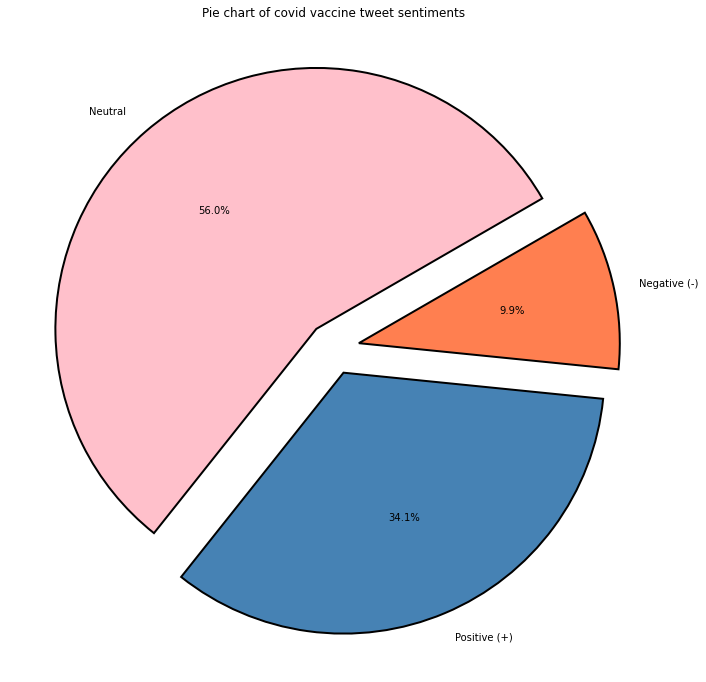

In [28]:
tweet_figure = plt.figure(figsize=(12,12))
senti_tag = tweet_dataframe['sentiment'].value_counts()
senti_tag.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = ("pink", "steelblue", "coral"),
         startangle=30, wedgeprops = {'linewidth':2, 'edgecolor':"black"}, explode = (0.1,0.1,0.1), label='')

plt.title('Pie chart of covid vaccine tweet sentiments')

In [30]:
negativeTweets = tweet_dataframe[tweet_dataframe.sentiment == 'Negative (-)']
negativeTweets = negativeTweets.sort_values(['polarity'], ascending= False)
negativeTweets.head()

,text,polarity,sentiment
61880,woke around 1 sweaty fever broken pretty muc...,-6.938894e-18,Negative (-)
53579,grannygail31 congrats gg first dose moderna...,-9.251859e-18,Negative (-)
83234,zombie translating pziser blue zombie ba...,-1.110223e-17,Negative (-)
128724,double dosed ass currently kicked tired bit ...,-1.110223e-17,Negative (-)
220222,oh man moderna looking good article sorr...,-1.850372e-17,Negative (-)


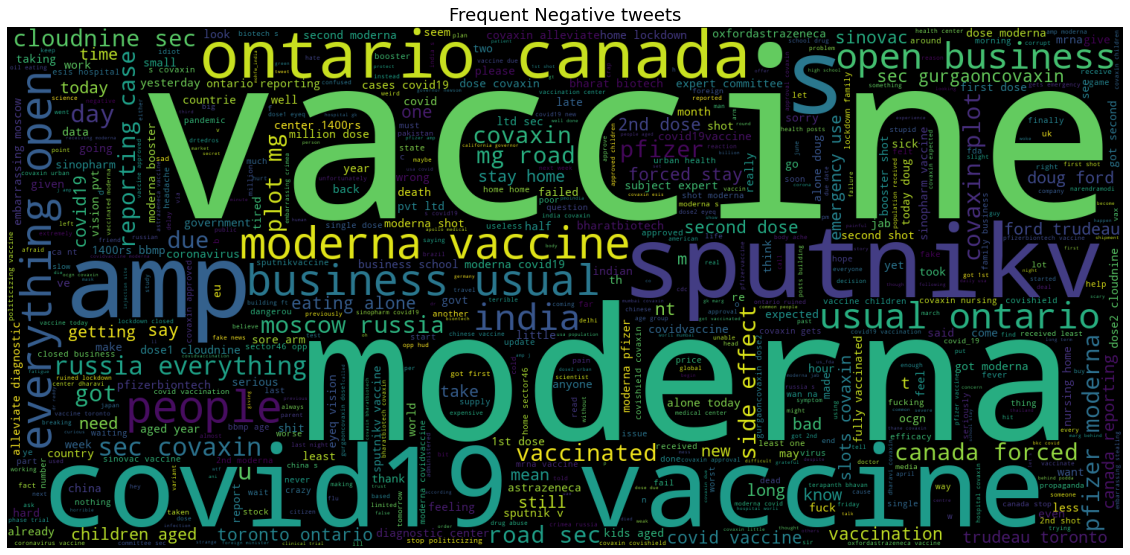

In [35]:
tweet_text = ' '.join([w for w in negativeTweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
word_cloud = WordCloud(max_words=600, width=1500, height=700).generate(tweet_text)
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Frequent Negative tweets', fontsize=18)
plt.show()

### 6. Baseline performance 
According to this literature text found on lexalytics, when evaluating the sentiments, the baseline is usually 80%. This can be found at https://www.lexalytics.com/blog/sentiment-accuracy-baseline-testing/#:~:text=Setting%20a%20baseline%20sentiment%20accuracy,training%20a%20sentiment%20scoring%20system

Therefore, in this sentiment analysis project, the baseline accuracy is 80% and classifier implemented must be able to beat the baseline, that is the final accuracy has to be more than 80%.




### 7. Classification approach 

The labels that will be used is the text ( tweet) and the sentiment of the tweet, whether they are positive, negative or neutral. This will allow the classifier to see if the tweets are accurately labelled.

For this sentiment analysis project, I have chosen to use Multinomial Naive Byes and ut is a supervised learning method that uses probability and it primarily focuses on text classification. Therefore, this classifier helps to find the probabilities of classes that are assigned to texts. This is done by using the joint probabilties of words and classes which is relevant for what I am doing as I will be using the joint probabilities of the tweets ( texts ) and the sentiments ( whether the text is postive ir negative).





### Split the Data into Training and Testing sets



In [31]:
X = tweet_dataframe['text']
Y = tweet_dataframe['sentiment']


In [32]:
XTrain, XTest, YTrain, YTest = train_test_split( X, Y, test_size=0.25, random_state=42)


In [33]:
vect.fit(XTrain)
print('No. of feature_words: ', len(vect.get_feature_names()))

No. of feature_words:  500000


In [34]:
XTrain = vect.transform(XTrain)
XTest  = vect.transform(XTest)

In [35]:
print("Size of XTrain:", (XTrain.shape))
print("Size of YTrain:", (YTrain.shape))
print("Size of XTest:", (XTest.shape))
print("Size of Ytest:", (YTest.shape))

Size of XTrain: (171155, 500000)
Size of YTrain: (171155,)
Size of XTest: (57052, 500000)
Size of Ytest: (57052,)


In [36]:
mutlti_naiveb=MultinomialNB()


mutlti_naiveb_tfidf=mutlti_naiveb.fit(XTrain,YTrain)


In [37]:

mutlti_naiveb_pred = mutlti_naiveb.predict(XTest)


# III Conclusions 

### 9. Evaluation 

Evaluate your classifier on the data set. Use the metrics you identified above to 
quantitatively evaluate the performance of your approach.

I used acccuracy, precision, f score and report to evaluate the performance of my approach.

In [38]:
acc = accuracy_score(mutlti_naiveb_pred, YTest)
print("Accuracy:{:.2f}%".format(acc*100))

Accuracy:84.64%


In [39]:
print(confusion_matrix(YTest, mutlti_naiveb_pred))
print("\n")
print(classification_report(YTest, mutlti_naiveb_pred))

[[  889  2839  1851]
 [   27 31039   717]
 [    7  3324 16359]]


              precision    recall  f1-score   support

Negative (-)       0.96      0.16      0.27      5579
    Neutral        0.83      0.98      0.90     31783
Positive (+)       0.86      0.83      0.85     19690

    accuracy                           0.85     57052
   macro avg       0.89      0.66      0.67     57052
weighted avg       0.86      0.85      0.82     57052





According to the results, this model has as accuracy of 85%, Precision of 86%, recall of 83% and f1-score of 85%.

This shows that the model is 85% accurate that is 85% of the tweets will be labelled correctly, 83% recall refers to there will be 86% tweets lablled correctly, falling under the true postives category.
86% precision means that 86% percent of the tweets are accurately labelled.

The confusion matrix represnets the true positive, false negative, false positive and true negative.

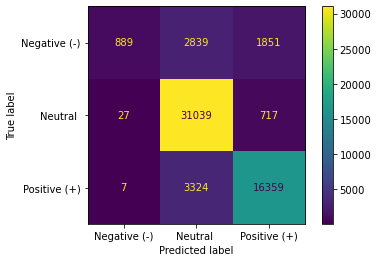

In [40]:
con_m = confusion_matrix(YTest, mutlti_naiveb_pred, labels=mutlti_naiveb.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = con_m, display_labels= mutlti_naiveb.classes_)
cm_disp.plot()

### 10. Summary and conclusions 

This reaserach also shows that there are way more positive comments than negative comments, this shows that there has been a good progress around the world that is more and more people got vaccinated daily. 

According to bloomberg, more than 12 billion doses of vaccines have been administered across 184 countries which adds up to 9.27 million doses a day. (Bloomberg)
 
Also, now that we know percentage of negative comments and the frequently used negative words, we can deploy this to the twitter analytics team. Upon detecting the negative word, the tweet posted with that particular negative word can be flagged that is people will still be able to see the tweet but it would be viewed with a caution. 

This is important as the comments posted on twitter can be viewed by anyone around the world including the people who are less educated. These people might be influenced by these negative tweets and might end up not getting vaccinated which is dangerous. There were some tweets that posted alternative remedies to the vaccines and like wise, if people were to blindly follow it, it might lead to them incurring injuries and worst, it might lead to fatality.


This project research is transferable to other domain specific areas. Here, we were looking at the semantic analysis of covid-19 vaccine tweets. This project can also  be used to explore the other industries. We can review the tweets about sports or tweets about elections (politics)

This research can be also be done in Java but it will be harder as it does not have as much data science libraries as python.

For this I used the machine learning approach of multinomial naive byes.


# References

https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets 

https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/#:~:text=Over%20a%20year%20into%20the,have%20been%20given%20so%20far.

https://www.lexalytics.com/blog/sentiment-accuracy-baseline-testing/#:~:text=Setting%20a%20baseline%20sentiment%20accuracy,training%20a%20sentiment%20scoring%20system
 